In [167]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [168]:
# Task a)

# This function generates a square matrix with random integers between 0 and 10
def generating_square_matrix(n):
    matrix = []
    #  Loops n times to create n rows, which then are filled with integers
    for _ in range(n):
        row = [random.randint(0,10) for _ in range(n)]
        matrix.append(row)
    return matrix

# This function multiplies two matrices A and B 
def standard_multiplication(A, B):
    # n equals the lenght of A, since A and B are n x n matrices
    n = len(A)
    # Creates a n x n matrix C filled with zeros
    C = [[0] * n for _ in range(n)]
    
    for i in range(n):    # Taking a row from matrix ( A )       
        for j in range(n):   # and a column from matrix ( B ),     
            for k in range(n):   
                C[i][j] += A[i][k] * B[k][j]    # multiplying the matching numbers and adding the products together 
                                                # to get the value for that position in matrix C
    return C

In [169]:
# Task b)

# Measures the time taken to multiply matrices A and B
def benchmark_standard_multiplication(A, B):
    # Marks the beginning of the time measurement
    start_time = time.time()
    standard_multiplication(A, B)
    # Marks the end of the time measurement
    end_time = time.time()

    # elapsed_time is the time it took
    elapsed_time = end_time - start_time
    return elapsed_time

In [170]:
# Task c)

# Measures the time taken to multiply matrices A and B with NumPy implementaion
def benchmark_numpy_multiplication(A, B):
    start_time = time.time()
    # Converts the input matrices into NumPy arrays
    np_A = np.array(A)
    np_B = np.array(B)
    # Multiplies the arrays, which equals matrix multiplication
    np.dot(np_A, np_B)

    elapsed_time = time.time() - start_time
    return elapsed_time


In [171]:
# Displaying both time complexities

# Sets the maximum size of the matrices that will be generated
max_n = 1000
# Sets the size of the matrix and increases step by step by 100
step = 100

print("Benchmarking Matrix Multiplications:")

results = []

# For each matrix size, it generates two square matrices.
# Then measures the time taken for multiplication using both methods 
# and stores them in a list results.
for n in range(step, max_n + 1, step):      # range(start from 100, stop at 1001, always go 100 matrix size up )

    A = generating_square_matrix(n)
    B = generating_square_matrix(n)

    # The time taken with the standard matrix multiplication (without NumPy) for each matrix size
    standard_time = benchmark_standard_multiplication(A, B)
    
    # The time taken with the NumPy matrix multiplication for each matrix size
    numpy_time = benchmark_numpy_multiplication(A, B)

    results.append((n, standard_time, numpy_time))

    # Displaying the results
    print(f"Matrix Size: {n}x{n} | Custom Time: {standard_time:.5f} seconds | NumPy Time: {numpy_time:.5f} seconds")

Benchmarking Matrix Multiplications:
Matrix Size: 100x100 | Custom Time: 0.12890 seconds | NumPy Time: 0.00000 seconds
Matrix Size: 200x200 | Custom Time: 1.03225 seconds | NumPy Time: 0.01864 seconds
Matrix Size: 300x300 | Custom Time: 3.61614 seconds | NumPy Time: 0.02994 seconds
Matrix Size: 400x400 | Custom Time: 8.35847 seconds | NumPy Time: 0.08338 seconds
Matrix Size: 500x500 | Custom Time: 19.28159 seconds | NumPy Time: 0.18787 seconds
Matrix Size: 600x600 | Custom Time: 35.32162 seconds | NumPy Time: 0.45180 seconds
Matrix Size: 700x700 | Custom Time: 51.47864 seconds | NumPy Time: 0.45177 seconds
Matrix Size: 800x800 | Custom Time: 75.56557 seconds | NumPy Time: 0.75981 seconds
Matrix Size: 900x900 | Custom Time: 117.13031 seconds | NumPy Time: 1.93816 seconds
Matrix Size: 1000x1000 | Custom Time: 150.31688 seconds | NumPy Time: 2.68333 seconds


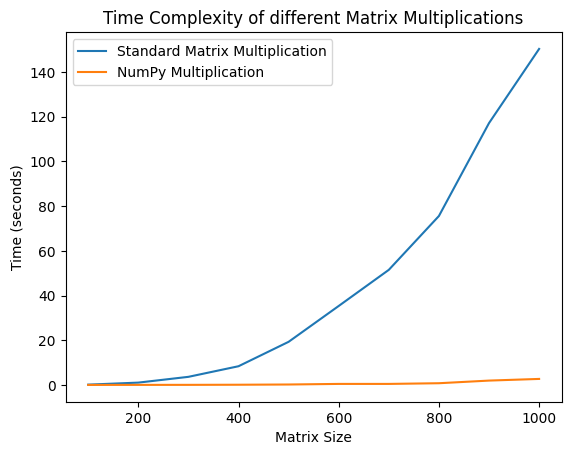

In [172]:
# Displaying the time complexities with a plot


# The list sizes goes through every tuple in results and extracts the first element, which is the matrix size n
sizes = [result[0] for result in results]

# Does the same as in sizes, but this time extracts the second elements in results, 
# which are the times taken for each matrix size without the NumPy
standard_times = [result[1] for result in results]

# Again does the same as in sizes, but now extracts the third elements in results, 
# which are the times taken for each matrix with the NumPy
numpy_times = [result[2] for result in results]

# This graph represents the standard times
plt.plot(sizes, standard_times, label="Standard Matrix Multiplication")
# This graph represent the NumPy times
plt.plot(sizes, numpy_times, label="NumPy Multiplication")
plt.xlabel("Matrix Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.title("Time Complexity of different Matrix Multiplications")
plt.show()

In [ ]:
# Task d)
# My implementation in Python uses the so called Big O notation to describe time complexity. 
# Python uses the O(n^3) for matrix multiplication. This is because the algorithm multiplies each row of matrix A 
# with each of from Matrix B and then lastly it sums up these producs to create the final matrix.
# Which means there are three loops involved, therefore n^3. 

# The NumPy implementation uses different Algorithms.
# NumPy changes Algorithms based on the size of the matrix. For smaller matrices it also uses the O(n^3), but for larger ones
# it switches to a more efficient algorithm, for instance to the Strassen algorithm which has a complexity of O(n^2.807). 
# That means that NumPy selects the best algorithm for the given matrix size, as to return the fastes results. 

# So to conclude, NumPy is much more efficient, the larger the matrix gets. It adapts its Algorithms to find the optimal
# complexity for the given matrix. While compared to pythons implementation, it gets slower the larger the matrix. 

In [174]:
# Taks e)

# Generating radnom matrix
def generating_matrices(size):
    return np.random.randint(0, 11, size=(size, size))

def matrix_multiplication(A, B):
    return np.dot(A, B)

# Function that splits the matrix into 4 submatrices
def split(matrix):
    n = matrix.shape[0]
    a = matrix[:n//2, :n//2]
    b = matrix[:n//2, n//2:]
    c = matrix[n//2:, :n//2]
    d = matrix[n//2:, n//2:]
    return a, b, c, d

def strassens_recursion(A, B):
    # If size of the matrix is 2 or smaller it uses normal matrix multiplication
    if A.shape[0] <= 2:
        return matrix_multiplication(A, B)
    
    # Split both matrices into 4 submatrices
    a, b, c, d = split(A)
    e, f, g, h = split(B)
    
    # Strassen Algorithm Formula
    p1 = strassens_recursion(a + d, e + h)
    p2 = strassens_recursion(d, g - e)
    p3 = strassens_recursion(a + b, h)
    p4 = strassens_recursion(b - d, g + h)
    p5 = strassens_recursion(a, f - h)
    p6 = strassens_recursion(c + d, e)
    p7 = strassens_recursion(a - c, e + f)

    # Combining the submatrices back together
    C11 = p1 + p2 - p3 + p4
    C12 = p5 + p3
    C21 = p6 + p2
    C22 = p5 + p1 - p6 - p7
    
    # Computing the final matrix C
    top = np.hstack((C11, C12))
    bottom = np.hstack((C21, C22))
    return np.vstack((top, bottom))

def strassens_no_recursion(A, B):
    a, b, c, d = split(A)
    e, f, g, h = split(B)

    # Same Strassen Algorithm Formula but now without the recursion
    p1 = matrix_multiplication(a + d, e + h)
    p2 = matrix_multiplication(d, g - e)
    p3 = matrix_multiplication(a + b, h)
    p4 = matrix_multiplication(b - d, g + h)
    p5 = matrix_multiplication(a, f - h)
    p6 = matrix_multiplication(c + d, e)
    p7 = matrix_multiplication(a - c, e + f)


    # Combining the submatrices back together
    C11 = p1 + p2 - p3 + p4
    C12 = p5 + p3
    C21 = p6 + p2
    C22 = p5 + p1 - p6 - p7
    
    # Computing the final matrix C
    top = np.hstack((C11, C12))
    bottom = np.hstack((C21, C22))
    return np.vstack((top, bottom))


print("Benchmarking the Strassen Algorithm: ")

# Generating matrices A and B of sizes that are powers of 2
for i in range(1, 10):  
    size = 2**i
    A = generating_matrices(size)
    B = generating_matrices(size)

    # Elapsed time for the recursion version
    start_time = time.time()
    multiplication = strassens_recursion(A, B)
    end_time = time.time()
    strassens_computing_time = end_time - start_time

    # Elapsed time for the non-recursive version
    start_time = time.time()
    multiplication = strassens_no_recursion(A, B)
    end_time = time.time()
    no_rec_strassens_computing_time = end_time - start_time

    print(f"Size: {size}x{size} | Strassen Recursion: {strassens_computing_time:.6f} seconds | Strassen no Recursion: {no_rec_strassens_computing_time:.6f} seconds")


Benchmarking the Strassen Algorithm: 
Size: 2x2 | Strassen Recursion: 0.000000 seconds | Strassen no Recursion: 0.000000 seconds
Size: 4x4 | Strassen Recursion: 0.007211 seconds | Strassen no Recursion: 0.000000 seconds
Size: 8x8 | Strassen Recursion: 0.000000 seconds | Strassen no Recursion: 0.000000 seconds
Size: 16x16 | Strassen Recursion: 0.003149 seconds | Strassen no Recursion: 0.000000 seconds
Size: 32x32 | Strassen Recursion: 0.025017 seconds | Strassen no Recursion: 0.000000 seconds
Size: 64x64 | Strassen Recursion: 0.131235 seconds | Strassen no Recursion: 0.000000 seconds
Size: 128x128 | Strassen Recursion: 0.997365 seconds | Strassen no Recursion: 0.000000 seconds
Size: 256x256 | Strassen Recursion: 6.838293 seconds | Strassen no Recursion: 0.014296 seconds
Size: 512x512 | Strassen Recursion: 48.504483 seconds | Strassen no Recursion: 0.166227 seconds


In [ ]:
# Comparing Strassen Algorithm with the previous approaches
# In generall for small matrices all approches are very efficient, but as the matrix size increases there are clear diffrences evident.
# The standard Python Implementation clearly takes the most time computing. Furthermore the Recursive Strassen Algorithm also takes a high amount
# of time compared to the non-recursive Strassen Algorithm. On the other hand, NumPy outperforms both the Strassen and my naive method. 
# The main issue with the Strassen Method, is that there are many more substeps taken to compute. As for the recursive version, the function
# calls itself repeatedly to divide the matrices into smaller subproblems. The nonrecursive version, computes all substeps in one level without recusrion,
# which avoids the repeated function calls. Furthermore it is importent that the matrices are of the power 2, because otherwise the Algorithm does not 
# work and would require additional padding to work correctly. 
# So as to conclude the NumPy is the fastes and most efficient in terms of the lines of code needed.